In [6]:
from keras.preprocessing.image import ImageDataGenerator
import os

# Path to the dataset folder
dataset_path = './dataset'

# Image size and batch size configuration
image_size = (128, 128)
batch_size = 32

# Creating an ImageDataGenerator object with a validation split
datagen = ImageDataGenerator(rescale=1./255)  # 20% of the data will be used as validation

# Setting up the training data generator
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Setting up the validation data generator
test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Print the class labels for both generators
print(train_generator.class_indices)
print(test_generator.class_indices)

Found 2720 images belonging to 2 classes.
Found 681 images belonging to 2 classes.
{'edible': 0, 'poisonous': 1}
{'edible': 0, 'poisonous': 1}


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# # Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# # Add a max pooling layer with a 2x2 pool size
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add another convolutional layer with 64 filters and ReLU activation
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # Add another max pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
model.add(Dense(2, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               6291584   
                                                                 
 dense_11 (Dense)            (None, 512)               66048     
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 2)                 514       
                                                                 
Total params: 6,489,474
Trainable params: 6,489,474
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10
 1/85 [..............................] - ETA: 8s - loss: 0.7064 - accuracy: 0.5625

2024-05-26 12:59:40.237256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


85/85 [==============================] - 9s 101ms/step - loss: 0.6459 - accuracy: 0.6529
Epoch 2/10
85/85 [==============================] - 9s 104ms/step - loss: 0.6455 - accuracy: 0.6529
Epoch 3/10
85/85 [==============================] - 9s 100ms/step - loss: 0.6462 - accuracy: 0.6529
Epoch 4/10
85/85 [==============================] - 9s 102ms/step - loss: 0.6460 - accuracy: 0.6529
Epoch 5/10
85/85 [==============================] - 9s 102ms/step - loss: 0.6458 - accuracy: 0.6529
Epoch 6/10
85/85 [==============================] - 9s 101ms/step - loss: 0.6461 - accuracy: 0.6529
Epoch 7/10
85/85 [==============================] - 9s 103ms/step - loss: 0.6463 - accuracy: 0.6529
Epoch 8/10
85/85 [==============================] - 9s 100ms/step - loss: 0.6461 - accuracy: 0.6529
Epoch 9/10
85/85 [==============================] - 9s 105ms/step - loss: 0.6468 - accuracy: 0.6529
Epoch 10/10
85/85 [==============================] - 9s 103ms/step - loss: 0.6460 - accuracy: 0.6529


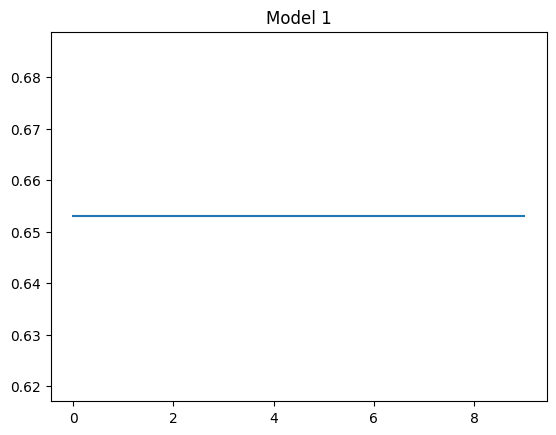

In [14]:
import matplotlib.pyplot as plt

plt.title("Model 1")
plt.plot(history.history['accuracy'],label='accuracy')

In [ ]:
validation_results = model.evaluate_generator(test_generator)
print(validation_results)

In [ ]:
# Specify the file path to save the model
model_path = 'cnn.h5'

# Save the model
model.save(model_path)
